In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import misc

import time

Let's do some setup and  load in image 

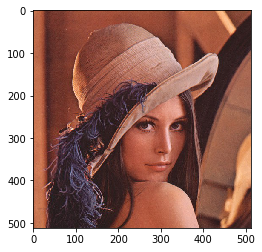

Image size: (512, 512, 3)


In [2]:
img = misc.imread('lena.tif').astype(np.float)/255
#plt.figure()
plt.imshow(img)
plt.show()

print('Image size:',img.shape)

Now, implement convolution of image of NxM pixels and C spectral bands (C=3 for a RGB image) 
with a filter kernel of size Nk x Mk. THis image has 512x512 pixels and 3 band since it is a colour image. 

To compute the result of pixel (i,j,c), place the filter kernel at pixel (i,j,c) and multiply the image and the filter at all locations where the filter overlaps the image, then sum the result. 
This sum can be computed using np.sum, or you can use 2 for-loops (this will be slower).

To compute the result of all pixels we need a for loop over all the indexes, in this case three for loops over image width (N), heigh (M) and number of channels (C). 

In this example we compute convolution only at those pixels where the filter kernel fits inside the image. 


In [10]:
def convolution(image, kernel):
  """
  Write a general function to convolve an image with an arbitrary kernel.
  """
  out = np.zeros(image.shape)
  kernel = kernel[::-1, ::-1] #Flipping kernel to follow convention
  N, M, C = image.shape
  Nk, Mk = kernel.shape
  nk_2 = Nk // 2
  mk_2 = Mk // 2
  for i in range(nk_2, N - nk_2):
    for j in range(mk_2, M - mk_2):
      for c in range(C):
        ## Fill in the result as the convolution at pixel i,j,c
        out[i, j, c] = np.sum((image[i-nk_2:i+nk_2+1, j-nk_2:j+nk_2+1, c]*kernel))
  return out

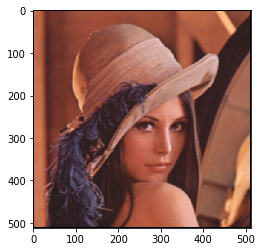

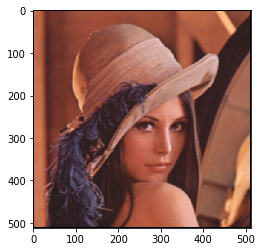

In [12]:
# Run this cell to cHeck that your image looks correct
img = plt.imread('lena.tif')



out = convolution(img, np.arange(25).reshape((5, 5)))
out -= out.min()
out /= out.max()
correct= plt.imread('convolution_lena.tif')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()


In [13]:
def blur_filter(img):
  """
  Use your convolution function to filter your image with an average filter (box filter)
  with kernal size of 11.
  """
  ## Fill in kernel below
  kernel = np.ones((11,11))/(11*11)
  return convolution(img, kernel)


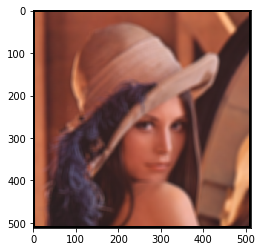

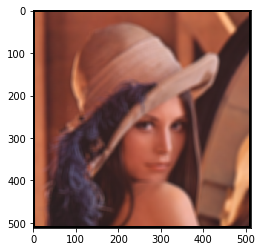

In [14]:
# Run this to check your blurred image 
img = plt.imread('lena.tif').astype(np.float) / 255
out = blur_filter(img)
out -= out.min()
out /= out.max()
correct = plt.imread('blur_lena.tif')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()

In [15]:
def sobel_filter(img):
  """
  Use your convolution function to filter your image with a vertical sobel kernel to find vertical edges
  """
  #Fill kernel and call convolution
  kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
  return convolution(img, kernel)




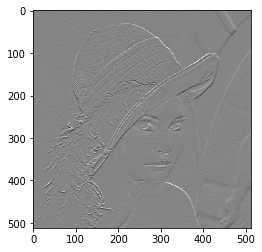

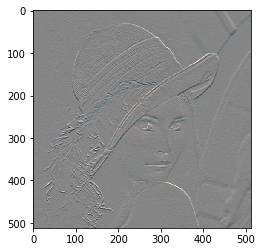

In [16]:
# Run this to dheck the sobel image 
out = sobel_filter(img)
out -= out.min()
out /= out.max()
correct = plt.imread('sobel_lena.tif')[:, :, :3]
plt.figure()
plt.imshow(correct, vmin=correct.min(), vmax=correct.max(), cmap='gray')
plt.figure()
plt.imshow(out, vmin=out.min(), vmax=out.max())
plt.show()